In [19]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
print(f"torch version: {torch.__version__}")
use_cuda = torch.cuda.is_available()
if use_cuda:
    GPU_nums = torch.cuda.device_count()
    GPU = torch.cuda.get_device_properties(0)
    print(f"There are {GPU_nums} GPUs in total.\nThe first GPU is: {GPU}")
    if '3060' in GPU.name:
        print(f"CUDA version: {torch.cuda_version}")
    else:
        print(f"CUDA version: {torch.version.cuda}")
device = torch.device(f"cuda:{GPU_nums - 1}" if use_cuda else "cpu")
print(f"Using {device} now!")

torch version: 1.10.2+cu113
There are 8 GPUs in total.
The first GPU is: _CudaDeviceProperties(name='Tesla V100-SXM2-32GB', major=7, minor=0, total_memory=32510MB, multi_processor_count=80)
CUDA version: 11.3
Using cuda:7 now!


In [3]:
from scipy.io import loadmat
import h5py

# ROOT = '/home/wangyh/02-Datasets/Z-NLOS'

# PATH = os.path.join(ROOT, os.listdir(ROOT)[0])
PATH = '/home/wangyh/01-Projects/02-NeTF/model/predicted_volume4_256.mat'
# file = h5py.File(PATH, mode='r')
file = loadmat(PATH)
for key in file.keys():
    if not key.endswith("__"):
        print(key, file[key].shape)

volume (256, 256, 256)
x (1, 256)
y (1, 256)
z (1, 256)
volume_rho (256, 256, 256)


In [4]:
volume, volume_rho = file["volume"], file["volume_rho"]

In [6]:
x, y, z = file["x"], file["y"], file["z"]
x

array([[-0.40000001, -0.39686275, -0.3937255 , -0.39058824, -0.38745099,
        -0.38431373, -0.38117648, -0.37803922, -0.37490197, -0.37176471,
        -0.36862746, -0.3654902 , -0.36235295, -0.35921569, -0.35607844,
        -0.35294118, -0.34980393, -0.34666667, -0.34352942, -0.34039216,
        -0.33725491, -0.33411765, -0.3309804 , -0.32784314, -0.32470589,
        -0.32156863, -0.31843138, -0.31529412, -0.31215687, -0.30901961,
        -0.30588236, -0.3027451 , -0.29960785, -0.29647059, -0.29333334,
        -0.29019608, -0.28705883, -0.28392157, -0.28078432, -0.27764706,
        -0.27450981, -0.27137255, -0.2682353 , -0.26509804, -0.26196079,
        -0.25882353, -0.25568628, -0.25254902, -0.24941177, -0.24627451,
        -0.24313726, -0.24      , -0.23686275, -0.23372549, -0.23058824,
        -0.22745098, -0.22431373, -0.22117647, -0.21803922, -0.21490196,
        -0.21176471, -0.20862745, -0.2054902 , -0.20235294, -0.19921569,
        -0.19607843, -0.19294118, -0.18980392, -0.1

In [15]:
albedo = volume_rho * volume
albedo.shape

(256, 256, 256)

In [16]:
albedo = np.flip(albedo, axis=(0, 2))

In [17]:
img_XOY = np.squeeze(np.max(albedo, axis=2))
img_XOZ = np.squeeze(np.max(albedo, axis=1))
img_YOZ = np.squeeze(np.max(albedo, axis=0))

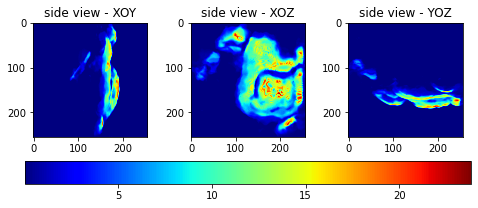

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

ax0 = axs[0].imshow(img_XOY, cmap="jet")
axs[0].set_title('side view - XOY')

ax1 = axs[1].imshow(img_XOZ, cmap="jet")
axs[1].set_title('side view - XOZ')

ax2 = axs[2].imshow(img_YOZ, cmap="jet")
axs[2].set_title('side view - YOZ')
# plt.tight_layout()

cb = fig.colorbar(ax1, ax=axs, orientation = 'horizontal', location='bottom')